In [171]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import h5py
import plot_settings

### Load and plot data

In [172]:
file_path = r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroGW\GW-signals\data_w_signal.hdf5"

In [173]:
# -- Read the data file (16 seconds, sampled at 4096 Hz)
fs = 4096
dataFile = h5py.File(file_path, 'r')
data = dataFile['strain/Strain'][...]
dataFile.close()
time = np.arange(0, 16, 1./fs)

In [284]:
template_path = r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroGW\GW-signals\template.hdf5"
templateFile = h5py.File(template_path, 'r')
template = templateFile['strain/Strain'][...]
temp_time = np.arange(0, template.size / (1.0*fs), 1./fs)
templateFile.close()

In [275]:
template = np.loadtxt(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroGW\GW-signals\GW150914_4_NR_waveform.txt").T[1]
temp_time = np.arange(0, template.size / (1.0*fs), 1./fs)

Text(0.5, 1.0, 'Template')

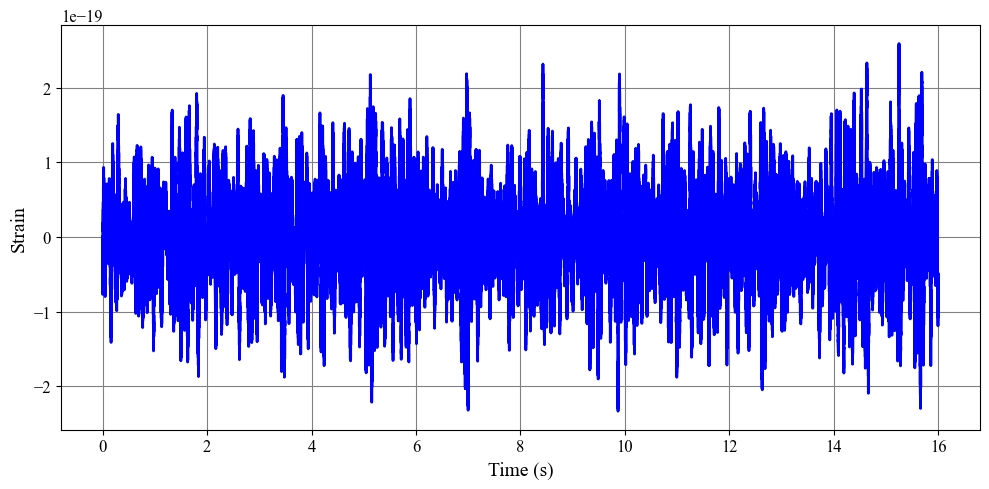

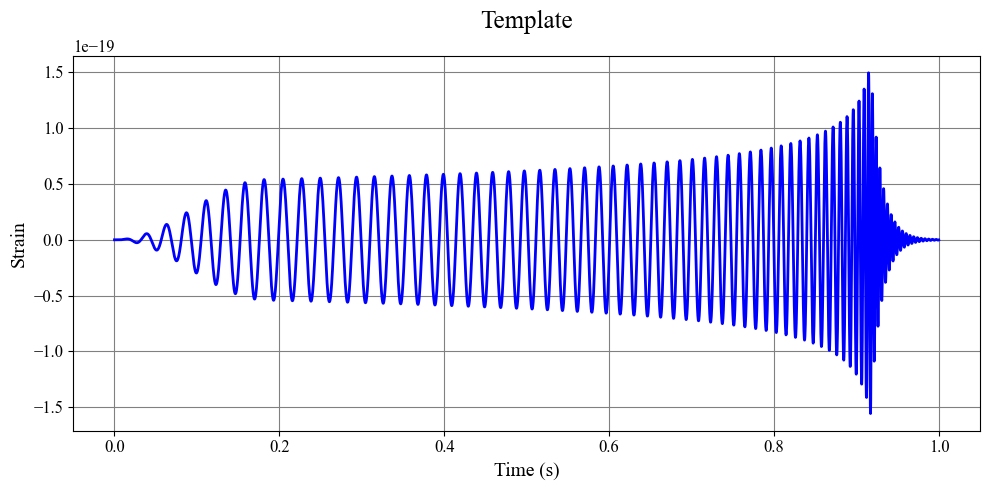

In [285]:
plt.figure()
plt.plot(time,data, label='Data', color='blue', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Strain')

plt.figure()
plt.plot(temp_time, template, color='blue', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Template')

In [286]:
NFFT = 4096
fs   = 4096

In [287]:
data_fft=np.fft.fft(data)

In [288]:
zero_pad = np.zeros(abs(data.size - template.size))
template_padded = np.append(template, zero_pad)
template_fft = np.fft.fft(template_padded)

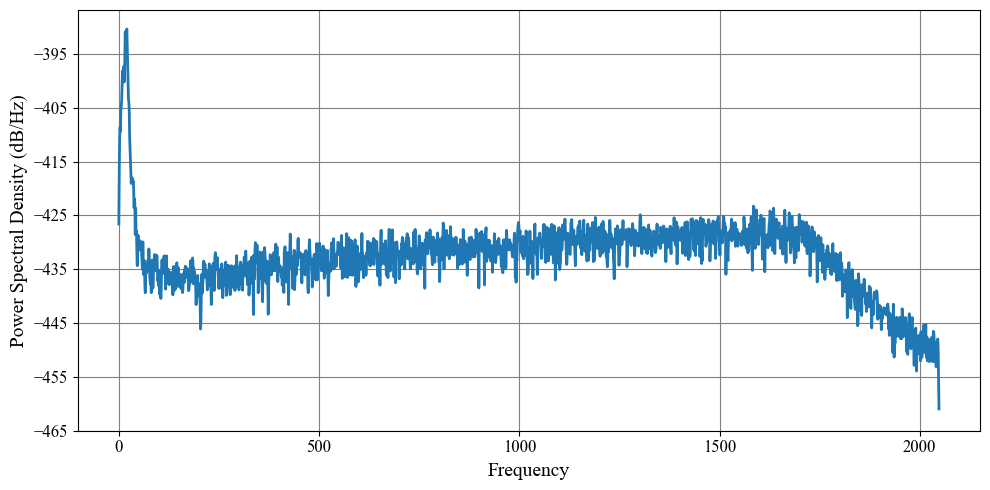

In [289]:
# -- Calculate the PSD of the data
power_data, freq_psd = plt.psd(data[12*fs:], Fs=fs, NFFT=fs, visible=True)

# -- Interpolate to get the PSD values at the needed frequencies
datafreq = np.fft.fftfreq(data.size)*fs
power_vec = np.interp(datafreq, freq_psd, power_data)

In [290]:
# -- Calculate the matched filter output
optimal = data_fft * template_fft.conjugate() / power_vec
optimal_time = 2*np.fft.ifft(optimal)

In [291]:
# -- Normalize the matched filter output
df = np.abs(datafreq[1] - datafreq[0])
sigmasq = 2*(template_fft * template_fft.conjugate() / power_vec).sum() * df
sigma = np.sqrt(np.abs(sigmasq))
SNR = abs(optimal_time) / (sigma)

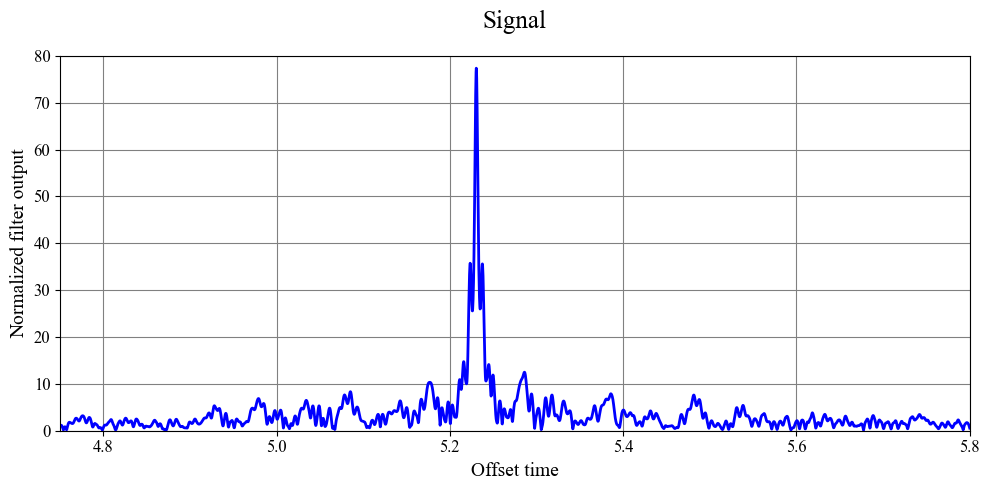

In [312]:
plt.plot(time, SNR, label='SNR', color='blue', alpha=1)
plt.axis([4.75,5.8,0,80])
plt.title('Signal')
plt.xlabel('Offset time')
plt.ylabel('Normalized filter output')
plt.savefig(r'C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroGW\PNGs\Template0.png')

In [319]:
idxl = min(np.where(time > 5.0)[0])
idxr = max(np.where(time < 5.4)[0])
idx = np.argmax(SNR[idxl:idxr]) + idxl

Text(0, 0.5, 'Strain')

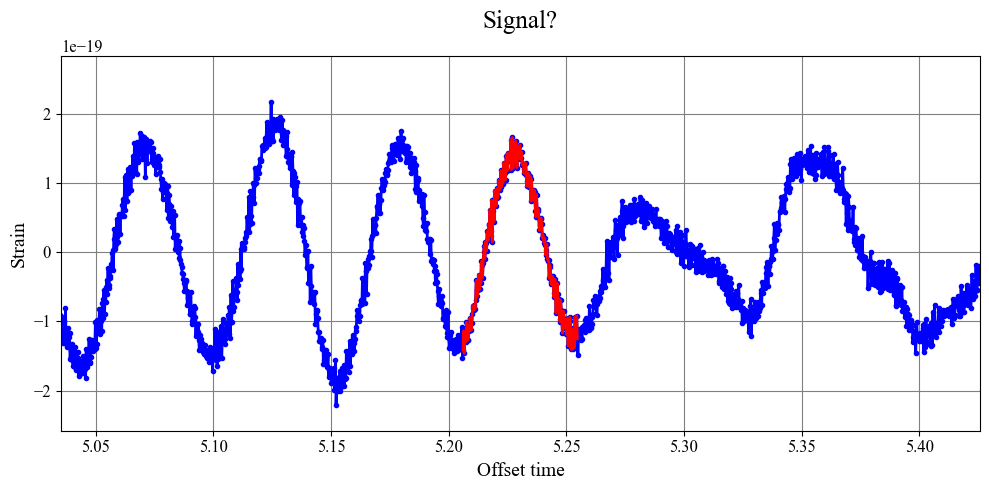

In [322]:
plt.plot(time, data, label='Data', color='blue', marker='.')
plt.plot(time[idx-100:idx+100], data[idx-100:idx+100], label='Data', color='red')
plt.xlim(time[idx-800],time[idx+800])
plt.title('Signal?')
plt.xlabel('Offset time')
plt.ylabel('Strain')